In [1]:
#0.Tai va su dung pandas
%pip install pandas
import pandas as pd
#1.Hien thi kiem tra
#Doc du lieu tu csv
df=pd.read_csv(r"D:\HocKy3_2024_2025\KhoaHocDuLieu\BaiTapNop\HaHuyNam_K215480106063_KhoaHocDuLieu_21_04_2025\DanhGiaCamXucVanBan\IMDB_Dataset.csv",encoding="utf-8")
#Hien thi 5 dong dau tien voi head()
print("Dữ liệu 5 dòng đầu:\n", df.head())

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.
Dữ liệu 5 dòng đầu:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
#2.Tien xu ly: de chuan hoa du lieu
# Cài đặt thư viện nếu chưa có
%pip install nltk
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
# Tải stop words
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
# Logic xử lý nội dung đánh giá
def XuLy_NoiDung_DanhGia(NoiDung_DanhGia):
    NoiDung_DanhGia = NoiDung_DanhGia.lower()  # Chuyển thành chữ thường
    NoiDung_DanhGia = re.sub(r"\W", " ", NoiDung_DanhGia)  # Loại bỏ ký tự đặc biệt
    NoiDung_DanhGia = re.sub(r"\s+", " ", NoiDung_DanhGia)  # Chuẩn hóa khoảng trắng
    tu = NoiDung_DanhGia.split()  # Tách từ
    tu = [t for t in tu if t not in stop_words]  # Loại bỏ stop words
    return " ".join(tu)
# Áp dụng xử lý cho nội dung đánh giá
df["DanhGiaDaXuLy"] = df["review"].apply(XuLy_NoiDung_DanhGia)
# Logic xử lý nhãn đánh giá
def XuLy_Nhan_DanhGia(Nhan_DanhGia):
    return {"positive": "Tích cực", "negative": "Tiêu cực"}.get(Nhan_DanhGia, "Không xác định")
# Áp dụng xử lý cho nhãn đánh giá
df["NhanDanhGia"] = df["sentiment"].apply(XuLy_Nhan_DanhGia)
# Chỉ hiển thị 5 dòng đầu của 2 cột đã xử lý
print(df[["DanhGiaDaXuLy", "NhanDanhGia"]].head())

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp39-cp39-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp39-cp39-win_amd64.whl (274 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                       DanhGiaDaXuLy NhanDanhGia
0  one reviewers mentioned watching 1 oz episode ...    Tích cực
1  wonderful little production br br filming tech...    Tích cực
2  thought wonderful way spend time hot summer we...    Tích cực
3  basically family little boy jake thinks zombie...    Tiêu cực
4  petter mattei love time money visually stunnin...    Tích cực


In [3]:
#3.Chia du lieu thanh tap train va test
#%pip install scikit-learn
from sklearn.model_selection import train_test_split
X = df["DanhGiaDaXuLy"]
y = df["NhanDanhGia"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("So luong mau train:", len(X_train))
print("So luong mau test:", len(X_test))

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#4.Xay dung pipeline:sử dụng TfidfVectorizer để chuyển đổi văn bản thành vector số và MultinomialNB để huấn luyện mô hình Naive Bayes
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# Tạo pipeline gồm TfidfVectorizer và MultinomialNB
pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer()),  
    ("classifier", MultinomialNB())  
])
# Huấn luyện mô hình trên tập Train
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

Note: you may need to restart the kernel to use updated packages.
Do chinh xac: 0.8663
Bao cao phan loai:
               precision    recall  f1-score   support

    Tiêu cực       0.86      0.88      0.87      4961
    Tích cực       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



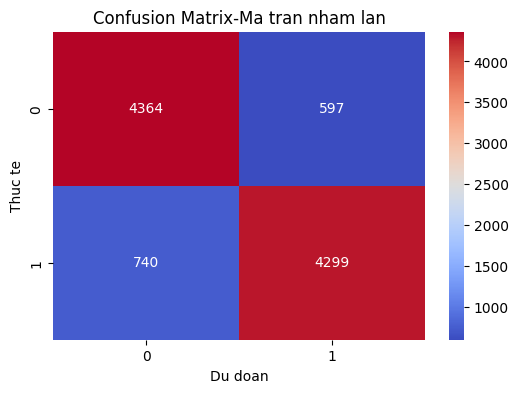

In [ ]:
#5.Kiem tra mo hinh tren tap test
%pip install seaborn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Dự đoán trên tập Test
y_pred = pipeline.predict(X_test)
# Đánh giá mô hình
print("Do chinh xac:", accuracy_score(y_test, y_pred))
print("Bao cao phan loai:\n", classification_report(y_test, y_pred))
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Du doan")
plt.ylabel("Thuc te")
plt.title("Confusion Matrix-Ma tran nham lan")
plt.show()

In [ ]:
#6.Kiem tra du doan
def DuDoan_CamXuc(VanBan):
    return pipeline.predict([VanBan])[0]  # Dự đoán và trả về kết quả (Tích cực / Tiêu cực)
# Kiểm tra thử
print(DuDoan_CamXuc("i don't like this film"))  # Dự kiến: Tiêu cực 
print(DuDoan_CamXuc("i like film"))  # Dự kiến: Tích cực

Tiêu cực
Tiêu cực
